In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp1baseline.csv","exp1morecontainers.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccfft,0,16,4,4,2022-03-11T00:39:53Z,2022-03-11T00:39:58Z,2022-03-11T00:43:22Z,2022-03-11T00:43:22Z,3m29.248566577s,1.22280
1,hpccfft,1,16,4,4,2022-03-11T00:43:24Z,2022-03-11T00:44:06Z,2022-03-11T00:47:27Z,2022-03-11T00:47:27Z,4m3.668429576s,1.29436
2,hpccfft,2,16,4,4,2022-03-11T00:47:55Z,2022-03-11T00:48:06Z,2022-03-11T00:51:25Z,2022-03-11T00:51:25Z,3m30.459063113s,1.30707
3,hpccfft,3,16,4,4,2022-03-11T00:51:26Z,2022-03-11T00:52:06Z,2022-03-11T00:55:31Z,2022-03-11T00:55:31Z,4m5.213055885s,1.23801
4,hpccfft,4,16,4,4,2022-03-11T00:55:58Z,2022-03-11T00:56:16Z,2022-03-11T00:59:40Z,2022-03-11T00:59:41Z,3m43.033142541s,1.23285
...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-11T15:46:01Z,2022-03-11T15:46:12Z,2022-03-11T15:48:35Z,2022-03-11T15:48:35Z,2m34.760231123s,8.44531
136,hpccstream,6,16,4,16,2022-03-11T15:49:02Z,2022-03-11T15:49:15Z,2022-03-11T15:51:33Z,2022-03-11T15:51:33Z,2m31.987401383s,8.06451
137,hpccstream,7,16,4,16,2022-03-11T15:52:02Z,2022-03-11T15:52:15Z,2022-03-11T15:54:34Z,2022-03-11T15:54:34Z,2m32.486589315s,8.00564
138,hpccstream,8,16,4,16,2022-03-11T15:55:03Z,2022-03-11T15:55:15Z,2022-03-11T15:57:35Z,2022-03-11T15:57:35Z,2m32.833423538s,8.82034


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [7]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [8]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final
0,hpccfft,0,16,4,4,2022-03-11 00:39:53+00:00,2022-03-11 00:39:58+00:00,2022-03-11 00:43:22+00:00,2022-03-11 00:43:22+00:00,0 days 00:03:29.248566577,1.22280,2022-03-11T00:39:53Z,0 days 00:00:05,0 days 00:03:24,0 days 00:00:00
1,hpccfft,1,16,4,4,2022-03-11 00:43:24+00:00,2022-03-11 00:44:06+00:00,2022-03-11 00:47:27+00:00,2022-03-11 00:47:27+00:00,0 days 00:04:03.668429576,1.29436,2022-03-11T00:39:53Z,0 days 00:00:42,0 days 00:03:21,0 days 00:00:00
2,hpccfft,2,16,4,4,2022-03-11 00:47:55+00:00,2022-03-11 00:48:06+00:00,2022-03-11 00:51:25+00:00,2022-03-11 00:51:25+00:00,0 days 00:03:30.459063113,1.30707,2022-03-11T00:39:53Z,0 days 00:00:11,0 days 00:03:19,0 days 00:00:00
3,hpccfft,3,16,4,4,2022-03-11 00:51:26+00:00,2022-03-11 00:52:06+00:00,2022-03-11 00:55:31+00:00,2022-03-11 00:55:31+00:00,0 days 00:04:05.213055885,1.23801,2022-03-11T00:39:53Z,0 days 00:00:40,0 days 00:03:25,0 days 00:00:00
4,hpccfft,4,16,4,4,2022-03-11 00:55:58+00:00,2022-03-11 00:56:16+00:00,2022-03-11 00:59:40+00:00,2022-03-11 00:59:41+00:00,0 days 00:03:43.033142540,1.23285,2022-03-11T00:39:53Z,0 days 00:00:18,0 days 00:03:24,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-11 15:46:01+00:00,2022-03-11 15:46:12+00:00,2022-03-11 15:48:35+00:00,2022-03-11 15:48:35+00:00,0 days 00:02:34.760231123,8.44531,2022-03-11T00:39:53Z,0 days 00:00:11,0 days 00:02:23,0 days 00:00:00
136,hpccstream,6,16,4,16,2022-03-11 15:49:02+00:00,2022-03-11 15:49:15+00:00,2022-03-11 15:51:33+00:00,2022-03-11 15:51:33+00:00,0 days 00:02:31.987401383,8.06451,2022-03-11T00:39:53Z,0 days 00:00:13,0 days 00:02:18,0 days 00:00:00
137,hpccstream,7,16,4,16,2022-03-11 15:52:02+00:00,2022-03-11 15:52:15+00:00,2022-03-11 15:54:34+00:00,2022-03-11 15:54:34+00:00,0 days 00:02:32.486589315,8.00564,2022-03-11T00:39:53Z,0 days 00:00:13,0 days 00:02:19,0 days 00:00:00
138,hpccstream,8,16,4,16,2022-03-11 15:55:03+00:00,2022-03-11 15:55:15+00:00,2022-03-11 15:57:35+00:00,2022-03-11 15:57:35+00:00,0 days 00:02:32.833423538,8.82034,2022-03-11T00:39:53Z,0 days 00:00:12,0 days 00:02:20,0 days 00:00:00


In [9]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [10]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,init,run,final,afterstart
0,hpccfft,0,16,4,4,2022-03-11 00:39:53+00:00,2022-03-11 00:39:58+00:00,2022-03-11 00:43:22+00:00,2022-03-11 00:43:22+00:00,0 days 00:03:29.248566577,1.22280,2022-03-11 00:39:53+00:00,0 days 00:00:05,0 days 00:03:24,0 days 00:00:00,0 days 00:00:00
1,hpccfft,1,16,4,4,2022-03-11 00:43:24+00:00,2022-03-11 00:44:06+00:00,2022-03-11 00:47:27+00:00,2022-03-11 00:47:27+00:00,0 days 00:04:03.668429576,1.29436,2022-03-11 00:39:53+00:00,0 days 00:00:42,0 days 00:03:21,0 days 00:00:00,0 days 00:03:31
2,hpccfft,2,16,4,4,2022-03-11 00:47:55+00:00,2022-03-11 00:48:06+00:00,2022-03-11 00:51:25+00:00,2022-03-11 00:51:25+00:00,0 days 00:03:30.459063113,1.30707,2022-03-11 00:39:53+00:00,0 days 00:00:11,0 days 00:03:19,0 days 00:00:00,0 days 00:08:02
3,hpccfft,3,16,4,4,2022-03-11 00:51:26+00:00,2022-03-11 00:52:06+00:00,2022-03-11 00:55:31+00:00,2022-03-11 00:55:31+00:00,0 days 00:04:05.213055885,1.23801,2022-03-11 00:39:53+00:00,0 days 00:00:40,0 days 00:03:25,0 days 00:00:00,0 days 00:11:33
4,hpccfft,4,16,4,4,2022-03-11 00:55:58+00:00,2022-03-11 00:56:16+00:00,2022-03-11 00:59:40+00:00,2022-03-11 00:59:41+00:00,0 days 00:03:43.033142540,1.23285,2022-03-11 00:39:53+00:00,0 days 00:00:18,0 days 00:03:24,0 days 00:00:01,0 days 00:16:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-11 15:46:01+00:00,2022-03-11 15:46:12+00:00,2022-03-11 15:48:35+00:00,2022-03-11 15:48:35+00:00,0 days 00:02:34.760231123,8.44531,2022-03-11 00:39:53+00:00,0 days 00:00:11,0 days 00:02:23,0 days 00:00:00,0 days 15:06:08
136,hpccstream,6,16,4,16,2022-03-11 15:49:02+00:00,2022-03-11 15:49:15+00:00,2022-03-11 15:51:33+00:00,2022-03-11 15:51:33+00:00,0 days 00:02:31.987401383,8.06451,2022-03-11 00:39:53+00:00,0 days 00:00:13,0 days 00:02:18,0 days 00:00:00,0 days 15:09:09
137,hpccstream,7,16,4,16,2022-03-11 15:52:02+00:00,2022-03-11 15:52:15+00:00,2022-03-11 15:54:34+00:00,2022-03-11 15:54:34+00:00,0 days 00:02:32.486589315,8.00564,2022-03-11 00:39:53+00:00,0 days 00:00:13,0 days 00:02:19,0 days 00:00:00,0 days 15:12:09
138,hpccstream,8,16,4,16,2022-03-11 15:55:03+00:00,2022-03-11 15:55:15+00:00,2022-03-11 15:57:35+00:00,2022-03-11 15:57:35+00:00,0 days 00:02:32.833423538,8.82034,2022-03-11 00:39:53+00:00,0 days 00:00:12,0 days 00:02:20,0 days 00:00:00,0 days 15:15:10


In [11]:
df['benchmark'].unique()

array(['hpccfft', 'hpccdgemm', 'hpccrandomringbw', 'hpccrandomringlat',
       'hpccrandomaccess', 'hpccptrans', 'hpccstream'], dtype=object)

In [12]:
df['nWorkers'].unique()

array([ 4, 16])

#  performance

In [13]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [14]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccfft,16,4,4,1.248076,0.028099
0,hpccfft,16,4,16,1.125116,0.030078
0,hpccdgemm,16,4,4,16.347480,0.705591
0,hpccdgemm,16,4,16,4.934367,0.315141
0,hpccrandomringbw,16,4,4,0.026233,0.001430
0,hpccrandomringbw,16,4,16,0.023851,0.000759
0,hpccrandomringlat,16,4,4,67.159740,1.990717
0,hpccrandomringlat,16,4,16,66.913220,1.263181
0,hpccrandomaccess,16,4,4,0.026366,0.000723
0,hpccrandomaccess,16,4,16,0.023580,0.001830


  benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0   hpccfft      16       4         4         1.248076        0.028099
0   hpccfft      16       4        16         1.125116        0.030078
   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       4         4        16.347480        0.705591
0  hpccdgemm      16       4        16         4.934367        0.315141
          benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccrandomringbw      16       4         4         0.026233        0.001430
0  hpccrandomringbw      16       4        16         0.023851        0.000759
           benchmark  nTasks  nNodes  nWorkers  model_time_mean  \
0  hpccrandomringlat      16       4         4         67.15974   
0  hpccrandomringlat      16       4        16         66.91322   

   model_time_std  
0        1.990717  
0        1.263181  
          benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_ti

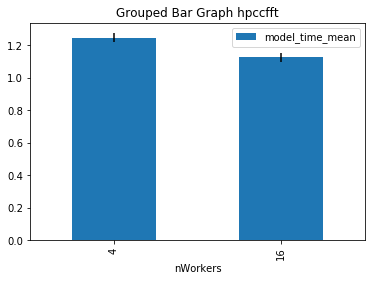

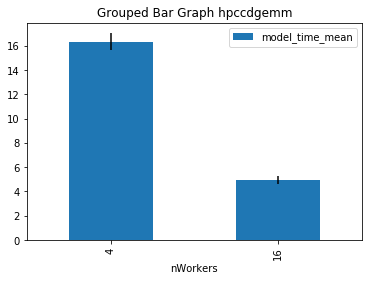

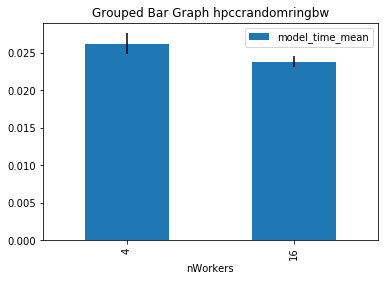

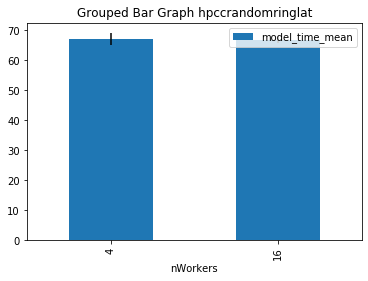

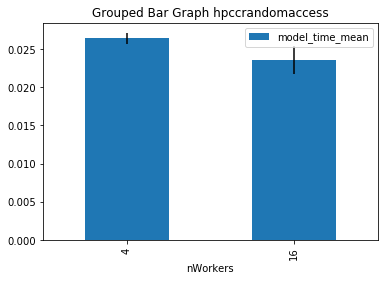

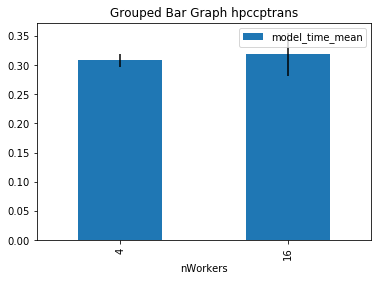

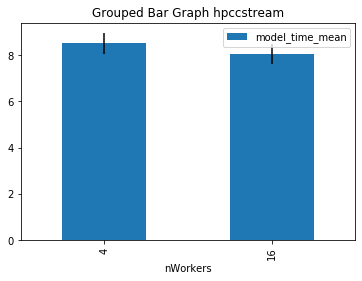

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [16]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [17]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccfft,16,4,4,0 days 00:00:25.500000,0 days 00:00:12.459935794,0 days 00:03:23.500000,0 days 00:00:02.291287847,0 days 00:00:00.100000,0 days 00:00:00.300000,0 days 00:03:49.666373857,0 days 00:00:12.823103189
0,hpccfft,16,4,16,0 days 00:00:10.900000,0 days 00:00:02.211334438,0 days 00:04:26.200000,0 days 00:00:03.572114219,0 days 00:00:00.200000,0 days 00:00:00.400000,0 days 00:04:37.731859970,0 days 00:00:03.700462598
0,hpccdgemm,16,4,4,0 days 00:00:24.400000,0 days 00:00:08.558037158,0 days 00:05:35.300000,0 days 00:00:14.533065746,0 days 00:00:00,0 days 00:00:00,0 days 00:06:00.270693726,0 days 00:00:19.462520303
0,hpccdgemm,16,4,16,0 days 00:00:09.200000,0 days 00:00:01.469693845,0 days 00:17:37.400000,0 days 00:00:26.777602581,0 days 00:00:00,0 days 00:00:00,0 days 00:17:47.121871155,0 days 00:00:27.364412003
0,hpccrandomringbw,16,4,4,0 days 00:00:17.900000,0 days 00:00:03.858756276,0 days 00:01:50.700000,0 days 00:00:02.100000,0 days 00:00:00,0 days 00:00:00,0 days 00:02:09.139521376,0 days 00:00:04.112500199
0,hpccrandomringbw,16,4,16,0 days 00:00:08.500000,0 days 00:00:00.921954445,0 days 00:03:13,0 days 00:00:02.489979919,0 days 00:00:00.100000,0 days 00:00:00.300000,0 days 00:03:22.118595715,0 days 00:00:02.374282325
0,hpccrandomringlat,16,4,4,0 days 00:00:17.900000,0 days 00:00:03.858756276,0 days 00:01:50.700000,0 days 00:00:02.100000,0 days 00:00:00,0 days 00:00:00,0 days 00:02:09.139521376,0 days 00:00:04.112500199
0,hpccrandomringlat,16,4,16,0 days 00:00:08.500000,0 days 00:00:00.921954445,0 days 00:03:13,0 days 00:00:02.489979919,0 days 00:00:00.100000,0 days 00:00:00.300000,0 days 00:03:22.118595715,0 days 00:00:02.374282325
0,hpccrandomaccess,16,4,4,0 days 00:00:21,0 days 00:00:09.412757300,0 days 00:02:36.400000,0 days 00:00:03.322649545,0 days 00:00:00,0 days 00:00:00,0 days 00:02:58.012993050,0 days 00:00:10.399691537
0,hpccrandomaccess,16,4,16,0 days 00:00:09.600000,0 days 00:00:01.854723699,0 days 00:03:51.500000,0 days 00:00:06.800735254,0 days 00:00:00,0 days 00:00:00,0 days 00:04:01.665465272,0 days 00:00:07.901889676


<ipython-input-16-850cf490fa20>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-850cf490fa20>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



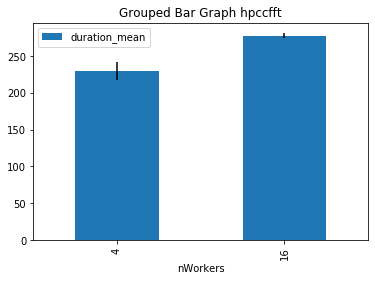

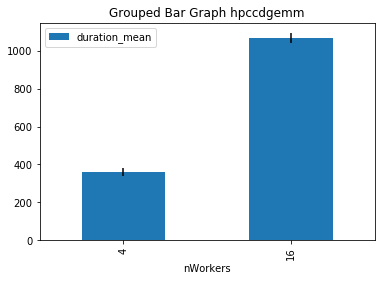

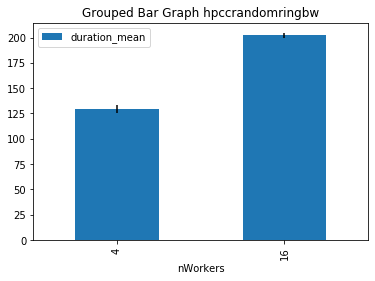

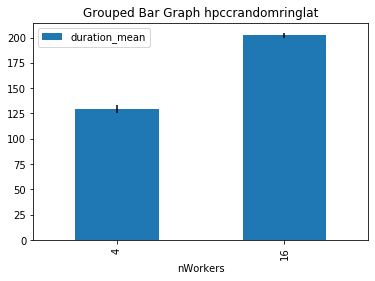

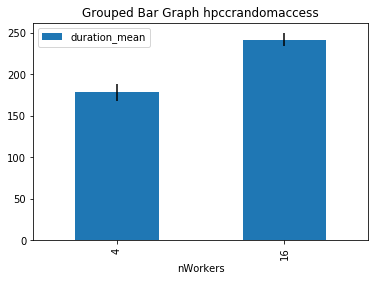

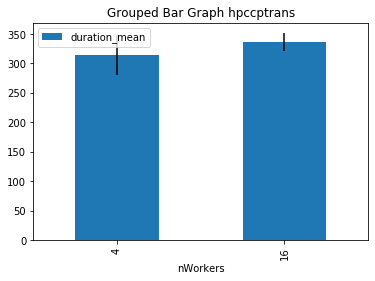

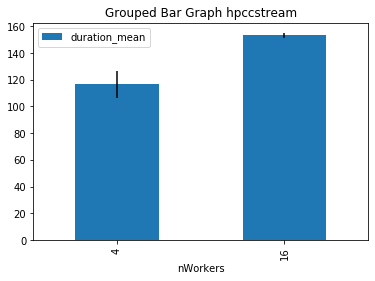

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [17]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,start,afterstart,init,run,final
0,hpccfft,0,16,4,4,2022-03-11 00:39:53+00:00,2022-03-11 00:39:58+00:00,2022-03-11 00:43:22+00:00,2022-03-11 00:43:22+00:00,0 days 00:03:29.248566577,1.22280,2022-03-11 00:39:53+00:00,0 days 00:00:00,0 days 00:00:05,0 days 00:03:24,0 days 00:00:00
1,hpccfft,1,16,4,4,2022-03-11 00:43:24+00:00,2022-03-11 00:44:06+00:00,2022-03-11 00:47:27+00:00,2022-03-11 00:47:27+00:00,0 days 00:04:03.668429576,1.29436,2022-03-11 00:39:53+00:00,0 days 00:03:31,0 days 00:00:42,0 days 00:03:21,0 days 00:00:00
2,hpccfft,2,16,4,4,2022-03-11 00:47:55+00:00,2022-03-11 00:48:06+00:00,2022-03-11 00:51:25+00:00,2022-03-11 00:51:25+00:00,0 days 00:03:30.459063113,1.30707,2022-03-11 00:39:53+00:00,0 days 00:08:02,0 days 00:00:11,0 days 00:03:19,0 days 00:00:00
3,hpccfft,3,16,4,4,2022-03-11 00:51:26+00:00,2022-03-11 00:52:06+00:00,2022-03-11 00:55:31+00:00,2022-03-11 00:55:31+00:00,0 days 00:04:05.213055885,1.23801,2022-03-11 00:39:53+00:00,0 days 00:11:33,0 days 00:00:40,0 days 00:03:25,0 days 00:00:00
4,hpccfft,4,16,4,4,2022-03-11 00:55:58+00:00,2022-03-11 00:56:16+00:00,2022-03-11 00:59:40+00:00,2022-03-11 00:59:41+00:00,0 days 00:03:43.033142540,1.23285,2022-03-11 00:39:53+00:00,0 days 00:16:05,0 days 00:00:18,0 days 00:03:24,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,hpccstream,5,16,4,16,2022-03-11 15:46:01+00:00,2022-03-11 15:46:12+00:00,2022-03-11 15:48:35+00:00,2022-03-11 15:48:35+00:00,0 days 00:02:34.760231123,8.44531,2022-03-11 00:39:53+00:00,0 days 15:06:08,0 days 00:00:11,0 days 00:02:23,0 days 00:00:00
136,hpccstream,6,16,4,16,2022-03-11 15:49:02+00:00,2022-03-11 15:49:15+00:00,2022-03-11 15:51:33+00:00,2022-03-11 15:51:33+00:00,0 days 00:02:31.987401383,8.06451,2022-03-11 00:39:53+00:00,0 days 15:09:09,0 days 00:00:13,0 days 00:02:18,0 days 00:00:00
137,hpccstream,7,16,4,16,2022-03-11 15:52:02+00:00,2022-03-11 15:52:15+00:00,2022-03-11 15:54:34+00:00,2022-03-11 15:54:34+00:00,0 days 00:02:32.486589315,8.00564,2022-03-11 00:39:53+00:00,0 days 15:12:09,0 days 00:00:13,0 days 00:02:19,0 days 00:00:00
138,hpccstream,8,16,4,16,2022-03-11 15:55:03+00:00,2022-03-11 15:55:15+00:00,2022-03-11 15:57:35+00:00,2022-03-11 15:57:35+00:00,0 days 00:02:32.833423538,8.82034,2022-03-11 00:39:53+00:00,0 days 15:15:10,0 days 00:00:12,0 days 00:02:20,0 days 00:00:00


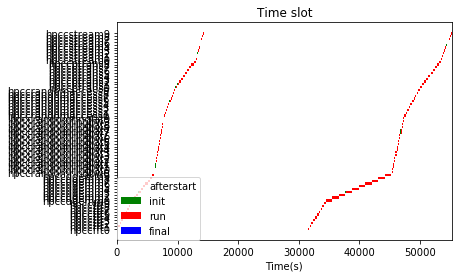

In [18]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 0])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
